In [1]:
import xlwings as xw
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

wb = xw.Book('price celling finder.xlsx')

# Calculate the price celling of the Capi. under the threshold of 30,000 


In [ ]:
capi_prices = np.arange(2000, 3000, 5)
capi_acceptance_prob = []
simu_times = 100
threshold = 30000

for capi_price in tqdm(capi_prices):
    wb.sheets['CostProbabilistic'].range('B61').value = capi_price
    ICERs = []
    for i in range(simu_times):
        wb.app.calculate()
        ICERs.append(wb.sheets['Simulaton'].range('AM4').value)
    capi_acceptance_prob.append(sum(np.array(ICERs) < threshold) / simu_times)




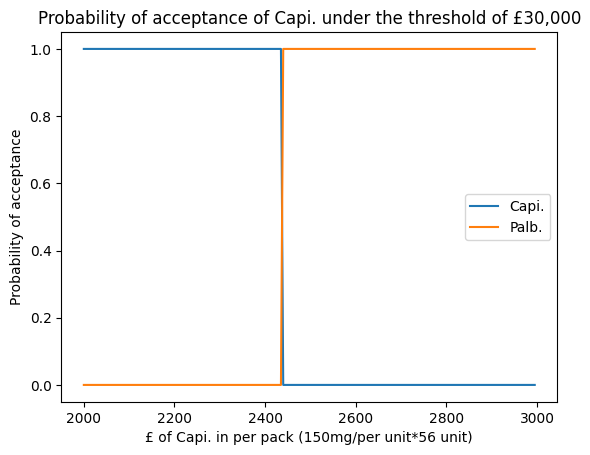

In [291]:
plt.plot(capi_prices, capi_acceptance_prob, label='Capi.')
plt.plot(capi_prices, 1 - np.array(capi_acceptance_prob), label='Palb.')
plt.xlabel('£ of Capi. in per pack (150mg/per unit*56 unit)')
plt.ylabel('Probability of acceptance')
plt.title('Probability of acceptance of Capi. under the threshold of £30,000')
plt.legend()